In [20]:
import time

import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
import matplotlib.patches as mpatches

from knn import CustomKNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

In [12]:
data = []
for feature in [1, 4, 9, 16, 25, 36, 49, 64]:
    for sample in np.logspace(1, 5, 10):
        print(f"feature={feature}, sample={sample}")
        X, y = make_regression(n_samples=int(sample), n_features=feature, noise=1, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        start = time.time()
        #brute_knn = CustomKNeighborsRegressor(n_neighbors=5, metric='minkowski', algorithm='brute')
        brute_knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', algorithm='brute')
        brute_knn.fit(X_train, y_train)
        brute_knn_pred = brute_knn.predict(X_test)
        end = time.time()
        brute_time = end - start
        
    
        
        start = time.time()
        #tree_knn = CustomKNeighborsRegressor(n_neighbors=5, metric='minkowski', algorithm='kd_tree')
        tree_knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', algorithm='kd_tree')
        tree_knn.fit(X_train, y_train)
        tree_knn = tree_knn.predict(X_test)
        end = time.time()
        tree_time = end - start
        
        assert np.allclose(brute_knn_pred, tree_knn), f"Predictions are different for feature={feature} and sample={sample}"
        
        if brute_time > tree_time:
            data += [(feature, sample, 1)]  # 1 means kd_tree is better
        else:
            data += [(feature, sample, 0)]  # 0 means brute is better

feature=1, sample=10.0
feature=1, sample=27.825594022071243
feature=1, sample=77.4263682681127
feature=1, sample=215.44346900318823
feature=1, sample=599.4842503189409
feature=1, sample=1668.100537200059
feature=1, sample=4641.588833612777
feature=1, sample=12915.496650148827
feature=1, sample=35938.13663804626
feature=1, sample=100000.0
feature=4, sample=10.0
feature=4, sample=27.825594022071243
feature=4, sample=77.4263682681127
feature=4, sample=215.44346900318823
feature=4, sample=599.4842503189409
feature=4, sample=1668.100537200059
feature=4, sample=4641.588833612777
feature=4, sample=12915.496650148827
feature=4, sample=35938.13663804626
feature=4, sample=100000.0
feature=9, sample=10.0
feature=9, sample=27.825594022071243
feature=9, sample=77.4263682681127
feature=9, sample=215.44346900318823
feature=9, sample=599.4842503189409
feature=9, sample=1668.100537200059
feature=9, sample=4641.588833612777
feature=9, sample=12915.496650148827
feature=9, sample=35938.13663804626
feature

In [ ]:
data = [(1, 1, 0), (1, 2, 1), (2, 3, 0), (2, 4, 1), (3, 5, 1), (3, 6, 1)]

Text(0, 0.5, 'Number of samples')

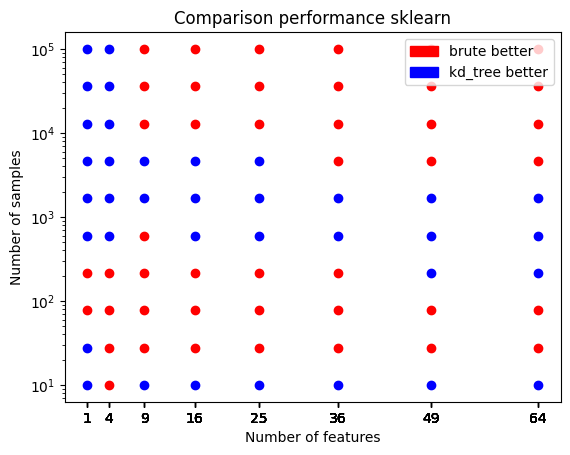

In [33]:
# create a scatterplot of the data
# the third argument is the color of the points
for x, y, color in data:
    #make y logarithmic axis
    plt.scatter(x, y, c=('r' if color == 0 else 'b'))
    plt.yscale('log')

# set xticks only where values are
x_values = [x for x, y, color in data]
plt.xticks(x_values)

# create patches for the legend
red_patch = mpatches.Patch(color='red', label='brute better')
blue_patch = mpatches.Patch(color='blue', label='kd_tree better')


# add legend with custom patches
plt.legend(handles=[red_patch, blue_patch])

# add title
plt.title('Comparison performance sklearn')
# axis labels
plt.xlabel('Number of features')
plt.ylabel('Number of samples')

In [28]:
np.logspace(1, 5, 10)

array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])

In [30]:
data_custom = []
for feature in [1, 4, 9, 16, 25, 36,]:
    for sample in [1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03,]:
        print(f"feature={feature}, sample={sample}")
        X, y = make_regression(n_samples=int(sample), n_features=feature, noise=1, random_state=42)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        
        start = time.time()
        brute_knn = CustomKNeighborsRegressor(n_neighbors=5, metric='minkowski', algorithm='brute')
        #brute_knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', algorithm='brute')
        brute_knn.fit(X_train, y_train)
        brute_knn_pred = brute_knn.predict(X_test)
        end = time.time()
        brute_time = end - start
        
    
        
        start = time.time()
        tree_knn = CustomKNeighborsRegressor(n_neighbors=5, metric='minkowski', algorithm='kd_tree')
        #tree_knn = KNeighborsRegressor(n_neighbors=5, metric='minkowski', algorithm='kd_tree')
        tree_knn.fit(X_train, y_train)
        tree_knn = tree_knn.predict(X_test)
        end = time.time()
        tree_time = end - start
        
        assert np.allclose(brute_knn_pred, tree_knn), f"Predictions are different for feature={feature} and sample={sample}"
        
        if brute_time > tree_time:
            data_custom += [(feature, sample, 1)]
        else:
            data_custom += [(feature, sample, 0)]

feature=1, sample=10.0
feature=1, sample=27.825594
feature=1, sample=77.4263683
feature=1, sample=215.443469
feature=1, sample=599.48425
feature=1, sample=1668.10054
feature=1, sample=4641.58883
feature=4, sample=10.0
feature=4, sample=27.825594
feature=4, sample=77.4263683
feature=4, sample=215.443469
feature=4, sample=599.48425
feature=4, sample=1668.10054
feature=4, sample=4641.58883
feature=9, sample=10.0
feature=9, sample=27.825594
feature=9, sample=77.4263683
feature=9, sample=215.443469
feature=9, sample=599.48425
feature=9, sample=1668.10054
feature=9, sample=4641.58883
feature=16, sample=10.0
feature=16, sample=27.825594
feature=16, sample=77.4263683
feature=16, sample=215.443469
feature=16, sample=599.48425
feature=16, sample=1668.10054
feature=16, sample=4641.58883
feature=25, sample=10.0
feature=25, sample=27.825594
feature=25, sample=77.4263683
feature=25, sample=215.443469
feature=25, sample=599.48425
feature=25, sample=1668.10054
feature=25, sample=4641.58883
feature=36,

Text(0, 0.5, 'Number of samples')

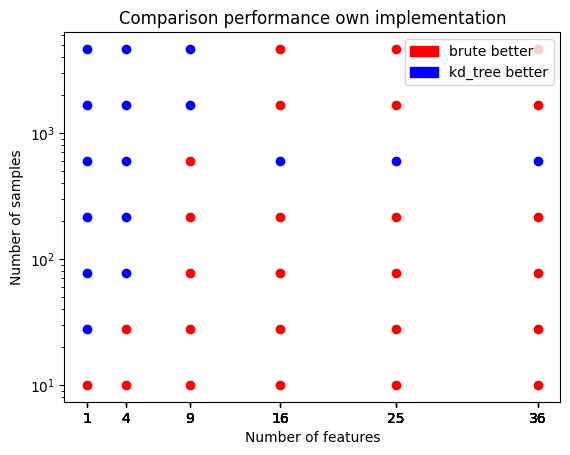

In [35]:
# create a scatterplot of the data
# the third argument is the color of the points
for x, y, color in data_custom:
    #make y logarithmic axis
    plt.scatter(x, y, c=('r' if color == 0 else 'b'))
    plt.yscale('log')
    
# set xticks only where values are
x_values = [x for x, y, color in data_custom]
plt.xticks(x_values)

# create patches for the legend
red_patch = mpatches.Patch(color='red', label='brute better')
blue_patch = mpatches.Patch(color='blue', label='kd_tree better')


# add legend with custom patches
plt.legend(handles=[red_patch, blue_patch])

# add title
plt.title('Comparison performance own implementation')
# axis labels
plt.xlabel('Number of features')
plt.ylabel('Number of samples')

Text(0, 0.5, 'Number of samples')

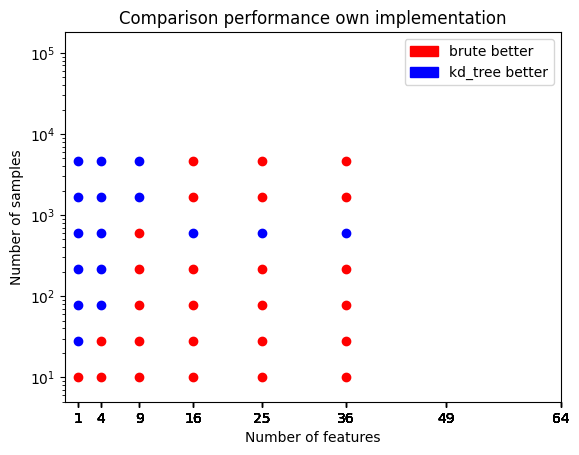

In [42]:
# create a scatterplot of the data
# the third argument is the color of the points
for x, y, color in data_custom:
    #make y logarithmic axis
    plt.scatter(x, y, c=('r' if color == 0 else 'b'))
    plt.yscale('log')
    
# set xticks only where values are
x_values = [x for x, y, color in data]
plt.xticks(x_values)
# set ylim
plt.ylim(5, 180000)

# create patches for the legend
red_patch = mpatches.Patch(color='red', label='brute better')
blue_patch = mpatches.Patch(color='blue', label='kd_tree better')


# add legend with custom patches
plt.legend(handles=[red_patch, blue_patch])

# add title
plt.title('Comparison performance own implementation')
# axis labels
plt.xlabel('Number of features')
plt.ylabel('Number of samples')

In [44]:
# pickle results
import pickle
with open('knn_eval.pkl', 'wb') as f:
    pickle.dump({"sklearn_results": data,
                 "custom_results": data_custom
                 }, f)

In [45]:
from knn import CustomKNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor